# HOMEWORK 2: DATA MINING

Name: Ellis

Student ID: 111065426

GitHub ID: aeotqf

Kaggle ID: 5833740 (username: ellisreyes)

Kaggle snapshot: 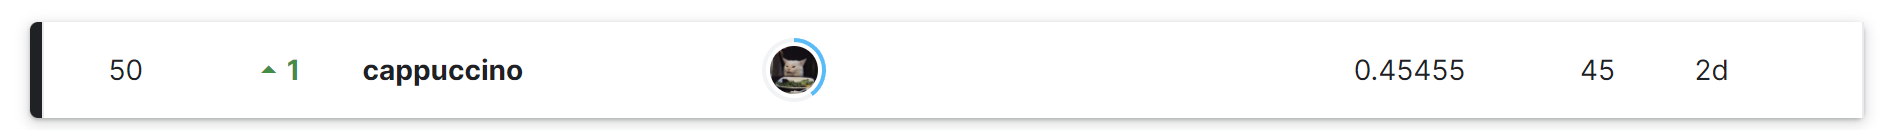

---

## PART 1: Take Home Exercises from DM2022-Lab2-Master

In [1]:
# importing some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


In [241]:
# Loading the data

# training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# test data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# concatenating test and training data
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

Familiarizing with the training data

In [242]:
# familiarizing with the data
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [243]:
train_df['emotion'].value_counts()

fear       1147
anger       857
joy         823
sadness     786
Name: emotion, dtype: int64

In [244]:
train_df['emotion'].value_counts().index

Index(['fear', 'anger', 'joy', 'sadness'], dtype='object')

### Exercise 1
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

1.1) For the training data

Getting the document term matrix for the training data

In [245]:
# getting the document term matrix for the training data
# https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction
#https://stackoverflow.com/questions/27488446/how-do-i-get-word-frequency-in-a-corpus-using-scikit-learn-countvectorizer

cv = CountVectorizer()
train_fit = cv.fit_transform(train_df['text']) #documents (rows) in the term matrix
train_fit_words = cv.get_feature_names_out() #words (features) in the term matrix
train_fit_vector = train_fit.toarray() #documents (rows) in the term matrix as array
train_fit_counts = train_fit.toarray().sum(axis=0) #number of times this word repeats in the corpus 

In [246]:
train_fit_words[:20] #first 20 words in the document term matrix

array(['00', '000', '00pm', '00tiffanyr', '01', '02', '03', '0303', '034',
       '04', '08', '080', '09', '095', '10', '100', '1000', '100000000',
       '100g', '100k'], dtype=object)

In [247]:
train_fit_vector[:20] #first 20 documents

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [248]:
train_fit_counts #number of times a word repeats in the corpus, here '00' repeats 2 times in all the documents in fit_vector

array([2, 1, 1, ..., 2, 2, 1], dtype=int64)

In [249]:
xbar=np.sort(train_fit_counts)[::-1][0:29] #getting the most repeated words
xbar

array([1736, 1289,  955,  796,  793,  787,  717,  626,  537,  535,  446,
        390,  383,  380,  350,  328,  312,  303,  301,  293,  288,  269,
        257,  243,  243,  231,  229,  228,  226], dtype=int64)

In [250]:
ybar=np.sort(train_fit_words)[::-1][0:29] #getting the most repeated words
ybar

array(['アニメ', 'सत', 'य_ब', 'ध_य', 'اليوم_الوطني', 'الخفجي', 'деньги',
       'óg', 'zumba', 'zoolander', 'zone', 'zombies', 'zombiecalorie',
       'zombie', 'zionist', 'zinabukvic_', 'zilch', 'zika', 'ziggomattic',
       'zeth', 'zero', 'zerfash', 'zephaniah', 'zen1dfabflake',
       'zavvihelp', 'zavvi', 'zandu', 'zamansj64', 'zak_atif'],
      dtype=object)

C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-p

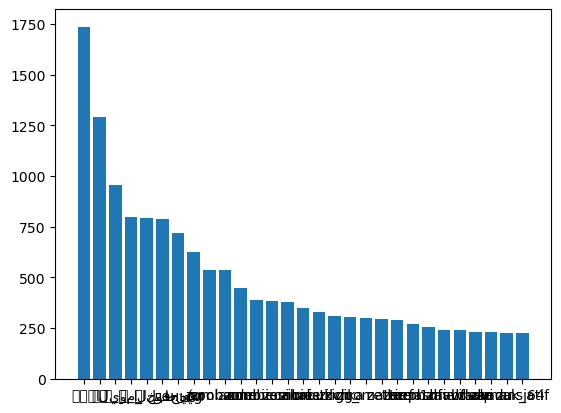

In [251]:
#1 Method 1) doing a barplot of the most frequent 30 words in the training data
plt.bar(ybar, xbar)
 
#plt.xlabel("Courses offered")
#plt.ylabel("No. of students enrolled")
#plt.title("Students enrolled in different courses")
plt.show()

In [252]:
#2 Method 2) doing the plot of the top 30 words in the training data using lab 1 method
term_frequencies = []
for j in range(0,train_fit.shape[1]):
    term_frequencies.append(sum(train_fit[:,j].toarray()))

In [253]:
term_frequencies = np.sort(np.asarray(train_fit.sum(axis=0))[0])[::-1][:30]
term_frequencies

array([1736, 1289,  955,  796,  793,  787,  717,  626,  537,  535,  446,
        390,  383,  380,  350,  328,  312,  303,  301,  293,  288,  269,
        257,  243,  243,  231,  229,  228,  226,  216], dtype=int64)

C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12491 (\N{KATAKANA LETTER NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ellis\anaconda3\lib\site-p

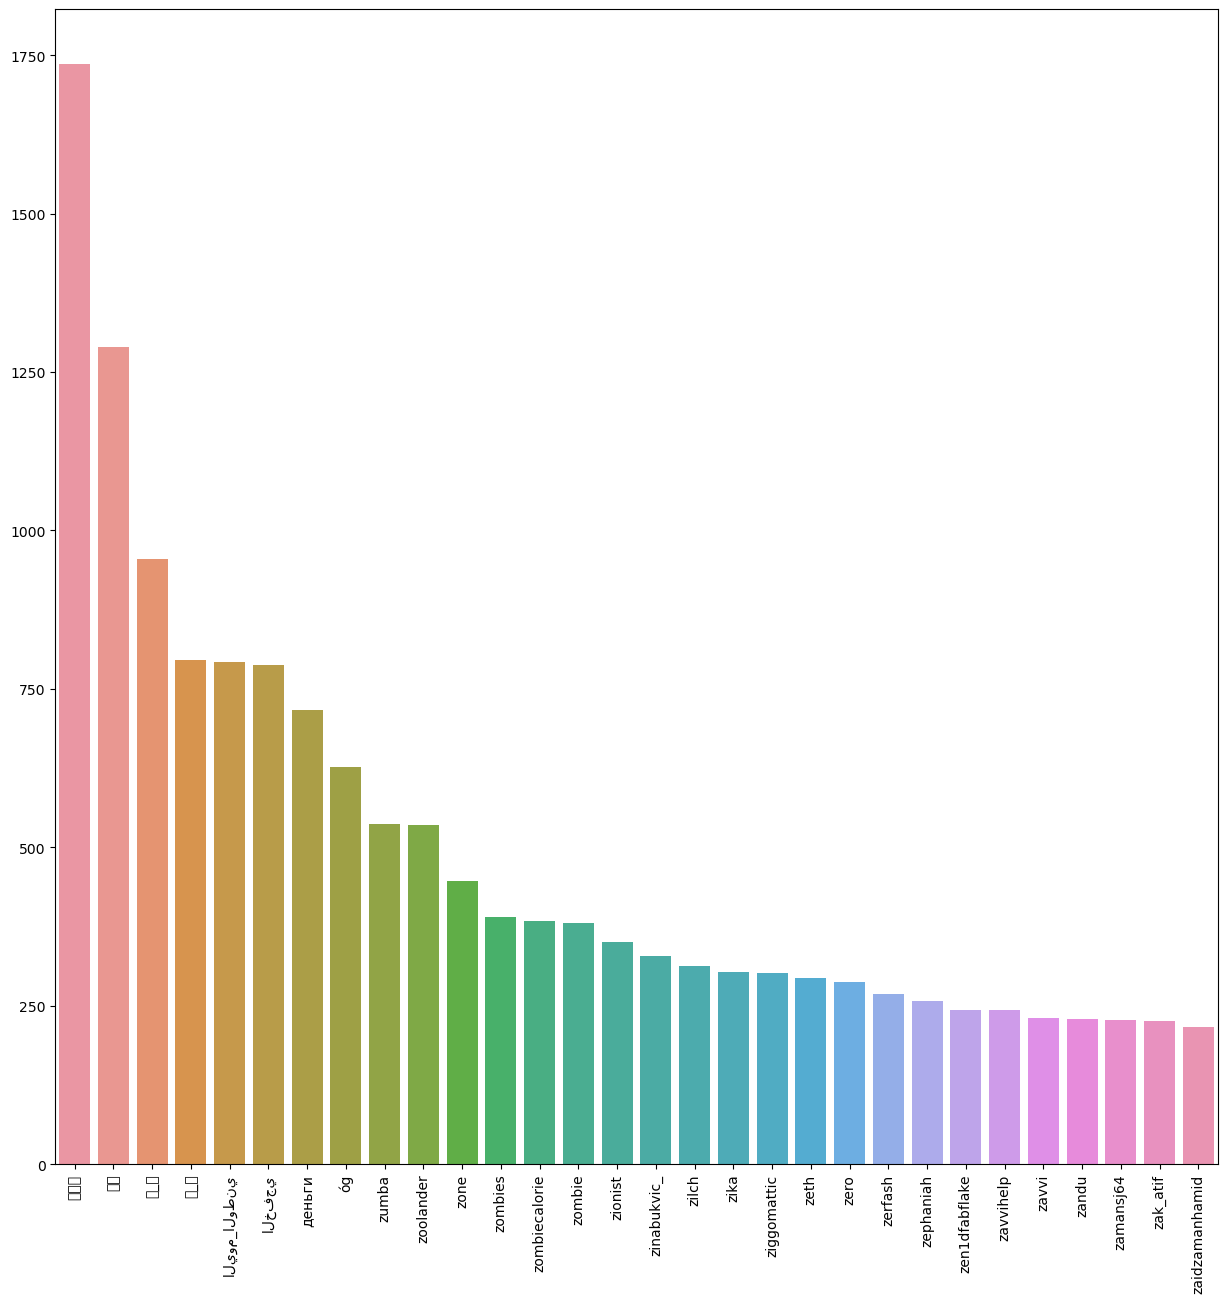

In [254]:
plt.subplots(figsize=(15, 15))
g = sns.barplot(x=train_fit_words[:30], 
            y=term_frequencies[:30])
g.set_xticklabels(np.sort(train_fit_words)[::-1][0:30], rotation = 90);

1.2) For the test data

In [255]:
# repeating the same steps to get the frecuencies from the document term matrix but fot the test data
cv = CountVectorizer()
test_fit = cv.fit_transform(test_df['text']) #documents (rows) in the term matrix
test_fit_words = cv.get_feature_names_out() #words (features) in the term matrix
test_fit_vector = test_fit.toarray() #documents (rows) in the term matrix as array
test_fit_counts = test_fit.toarray().sum(axis=0) #number of times this word repeats in the corpus 

In [256]:
# doing the plot of the top 30 words in the test data using lab 1 method
term_frequencies = []
for j in range(0,test_fit.shape[1]):
    term_frequencies.append(sum(test_fit[:,j].toarray()))

In [257]:
term_frequencies = np.sort(np.asarray(test_fit.sum(axis=0))[0])[::-1][:30]
term_frequencies

array([153, 138,  92,  83,  83,  82,  77,  69,  57,  55,  52,  46,  40,
        36,  34,  34,  32,  30,  30,  30,  29,  29,  29,  26,  26,  24,
        24,  24,  24,  24], dtype=int64)

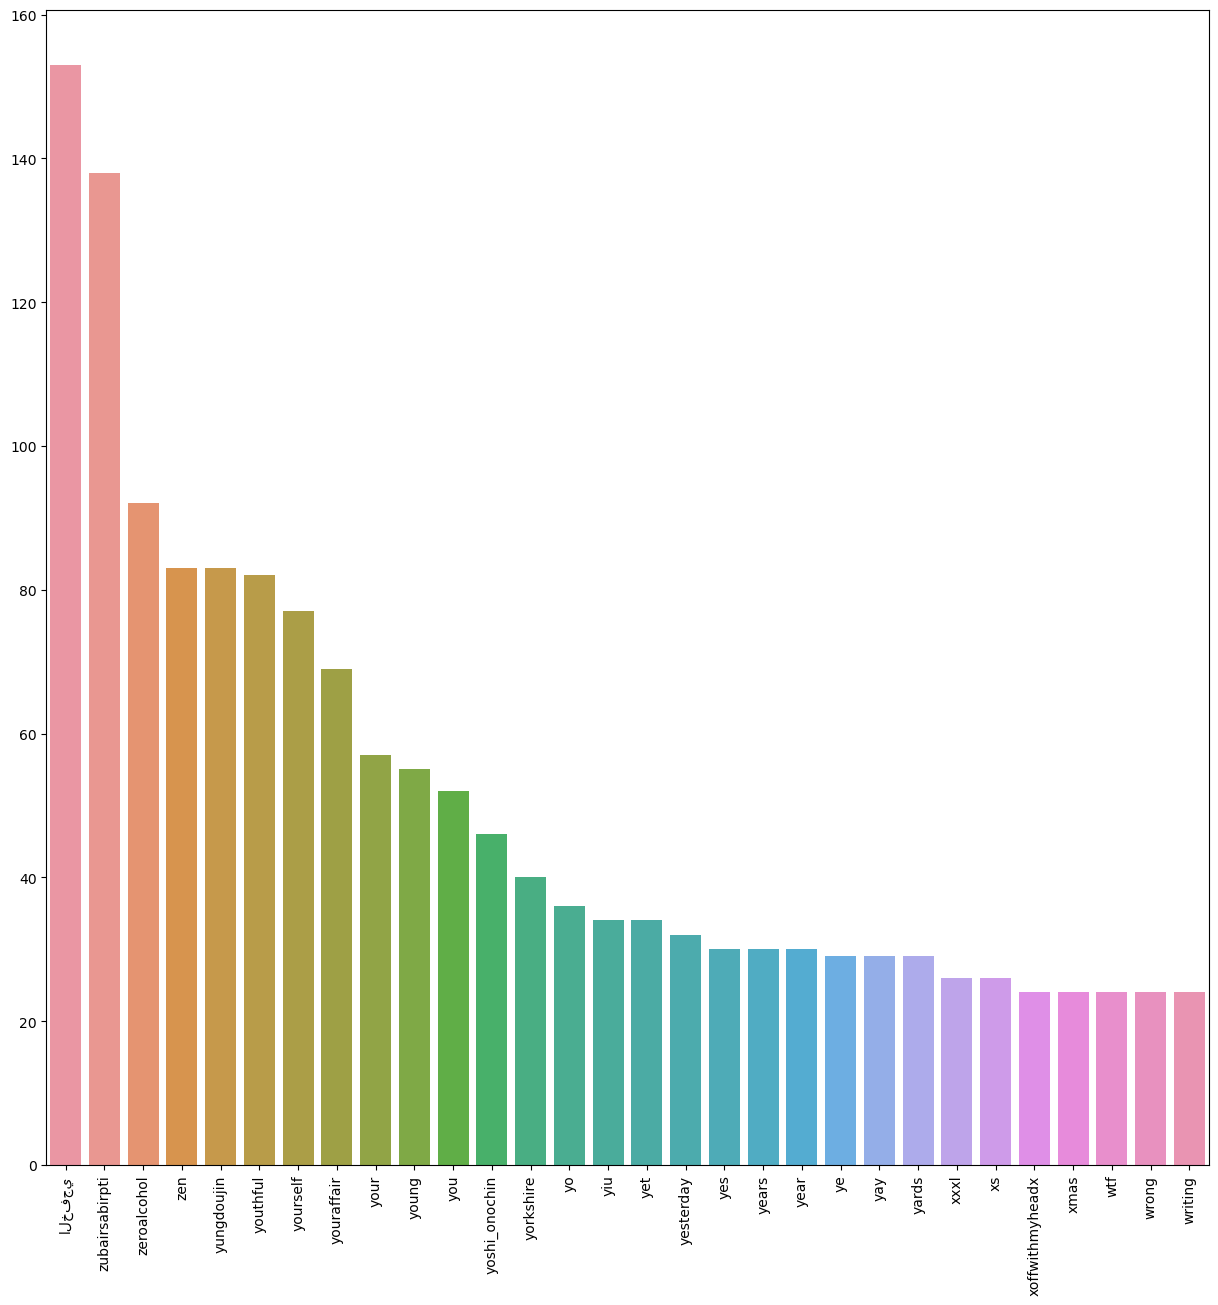

In [258]:
plt.subplots(figsize=(15, 15))
g = sns.barplot(x=test_fit_words[:30], 
            y=term_frequencies[:30])
g.set_xticklabels(np.sort(test_fit_words)[::-1][0:30], rotation = 90);

---
### Exercise 2 
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [259]:
#saving the data to pickle format
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [260]:
# building the analyzer with the TFIDF for the training data
tfidf = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
train_fit = tfidf.fit(train_df['text']) #documents (rows) in the term matrix

# Transform document to document-term matrix.
train_fit_transform = tfidf.transform(train_df['text'])
train_fit_vector = train_fit_transform.toarray() #documents (rows) in the term matrix as array
train_fit_transform.shape

C:\Users\Ellis\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 1000)

In [261]:
# observe some feature names for the training data
train_fit_words = tfidf.get_feature_names_out()
train_fit_words[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

In [262]:
# building the analyzer with the TFIDF for the test data
tfidf = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
test_fit = tfidf.fit(test_df['text']) #documents (rows) in the term matrix

# Transform document to document-term matrix.
test_fit_transform = tfidf.transform(test_df['text'])
test_fit_vector = test_fit_transform.toarray() #documents (rows) in the term matrix as array
test_fit_transform.shape

(347, 1000)

In [263]:
# observe some feature names for the test data
test_fit_words = tfidf.get_feature_names_out()
test_fit_words[100:110]

array(['appreciated', 'arch', 'are', 'arms', 'around', 'as', 'asked',
       'assistance', 'at', 'attempt'], dtype=object)

In [264]:
# Difference between the testing and training data
print('some feature names for the test data: ','\n', test_fit_words[100:110], '\n')
print('some feature names for the train data: ','\n',train_fit_words[100:110])

some feature names for the test data:  
 ['appreciated' 'arch' 'are' 'arms' 'around' 'as' 'asked' 'assistance' 'at'
 'attempt'] 

some feature names for the train data:  
 ['awful' 'b' 'baby' 'back' 'bad' 'ball' 'balls' 'bb18' 'bc' 'bday']


---
### Exercise 3
Can you interpret the results below? What do they mean?

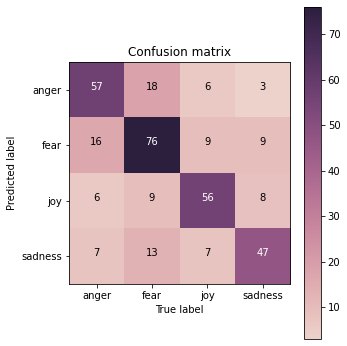

R/ The confusion matrix gives information about the true positives, true negatives, false positives and false negatives. In this exercise prior to the confusion matrix plot there is a very detail report of the clasification, if we focus on the anger class, it has 0.66 accuracy and 84 actual occurrences. Then if we compare with the matrix it tell us that anger has 57 of the 84 ocurrences well predicted as anger, 18 were wrong predicted as fear and so on. This repeats for the other clasess, the plot is more impacful to share the findings than just text.


---
### Exercise 4
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

R\ The results are good enough because NB can be trained with small data. 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [265]:
# references used:
# https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/
# https://iq.opengenus.org/naive-bayes-on-tf-idf-vectorized-matrix/
# https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# and the lab 2
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Transforming train data with count vectorizer 
cv = CountVectorizer()
X_train = cv.fit_transform(train_df['text'])
y_train = train_df['emotion']

# Transforming test data with count vectorizer
# for the test data fit.transform is not used because we want to extract the unique values only for the training data
X_test = cv.transform(test_df['text'])
y_test = test_df['emotion']


# look at data dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 10115)
y_train.shape:  (3613,)
X_test.shape:  (347, 10115)
y_test.shape:  (347,)


In [442]:
y_test[0:5]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [266]:
# building naive bayes model with Multinomial distribution 
nbm = MultinomialNB()

# training the model
nbm = nbm.fit(X_train, y_train)

# doing some predictions
y_train_pred = nbm.predict(X_train)
y_test_pred = nbm.predict(X_test)

y_test_pred[:10]

array(['anger', 'anger', 'anger', 'anger', 'fear', 'anger', 'anger',
       'anger', 'anger', 'sadness'], dtype='<U7')

In [267]:
## accuracy of the Naive Bayes model
from sklearn.metrics import accuracy_score
#accuracy_score(true vs prediction)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 4)))
print('testing accuracy: {}'.format(round(acc_test, 4)))

training accuracy: 0.9729
testing accuracy: 0.7723


In [268]:
# getting more information from the NB. precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.82      0.71      0.76        84
        fear       0.69      0.86      0.77       110
         joy       0.89      0.73      0.81        79
     sadness       0.76      0.74      0.75        74

    accuracy                           0.77       347
   macro avg       0.79      0.76      0.77       347
weighted avg       0.78      0.77      0.77       347



In [269]:
# getting the confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[60 15  3  6]
 [ 6 95  1  8]
 [ 4 14 58  3]
 [ 3 13  3 55]]


In [270]:
# Function for visualizing confusion_matrix as used in the lab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes)) #help sort the labels and add to matrix  
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)#display data as image
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd' #this is not obligatory, is for presentation purpose, integer presentation 
    thresh = cm.max() / 2. #change color of small thresh
    #the for loop apply all the formatting
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

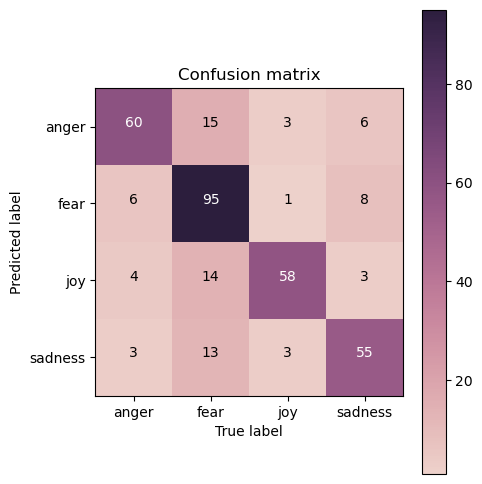

In [271]:
# plot confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### Exercise 5

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

Naive Bayes is simple to build and the training is really quick, maybe it can be used as a baseline model. Because of the same reasons NB can be a weak model given that the data needs to be independent.

Because in theory decision trees does not have the requeriments of the conditional independence they can be better for some datasets, however for that reason decision trees use more computational resources, given that the nodes grows really fast depending on the features and with a big dataset they tend to overfit.

In this exercise the dataset was small and both models were good enough, simple to build and quick to train. However in the kaggle competition, the Naive Bayes was really fast training and the decision tree was slow when using the whole data, both results were bad but if comparing the models the NB results were better because DT overfit. I did not try the DT with less features, maybe that was a mistake. I did try random forest, but  because of the grow in the nodes depending on the features, it never finished training before the deadline.

In [272]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

# training the model
DT_model = DT_model.fit(X_train, y_train)

# doing some predictions
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

# the pred result
y_test_pred[:10]

array(['anger', 'anger', 'fear', 'anger', 'fear', 'anger', 'anger',
       'anger', 'anger', 'anger'], dtype=object)

In [273]:
## accuracy of the Decision Tree model
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.8


In [274]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.76      0.82      0.79        84
        fear       0.78      0.80      0.79       110
         joy       0.85      0.85      0.85        79
     sadness       0.86      0.74      0.80        74

    accuracy                           0.80       347
   macro avg       0.81      0.80      0.81       347
weighted avg       0.81      0.80      0.80       347



In [275]:
## getting the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[69 10  4  1]
 [14 88  3  5]
 [ 3  6 67  3]
 [ 5  9  5 55]]


In [276]:
# Function for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes)) #help sort the labels and add to matrix  
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)#display data as image
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd' #this is not obligatory, is for presentation ppurpose, integer presentation 
    thresh = cm.max() / 2. #change color of small thresh
    #the for loop apply all the formatting
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

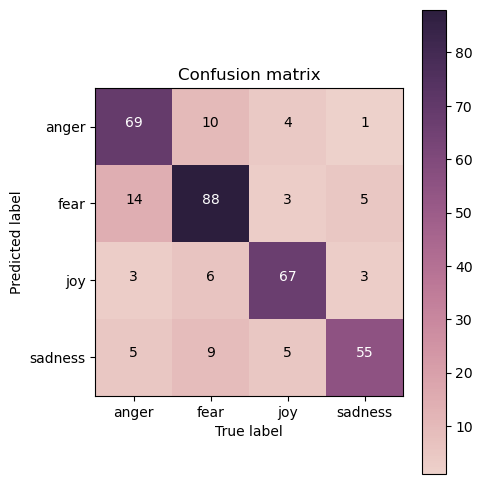

In [277]:
# ploting the confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### Exercise 6

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

6.1) First lets build the model from the lab 2, using big batch size

In [424]:
# Preparing the data
import keras

# standardize name (X, y) 
X_train = cv.transform(train_df['text'])
y_train = train_df['emotion']

X_test = cv.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 10115)
y_train.shape:  (3613,)
X_test.shape:  (347, 10115)
y_test.shape:  (347,)


In [425]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 0    anger
1    anger
2    anger
3    anger
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [426]:
# Build the Model
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  10115
output_shape:  4


In [427]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64 #hidden layers apply weights to the input
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)          #we can change the functions, maybe gradient descent instead of RelU

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4 #emotion prediction
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 10115)]           0         
                                                                 
 dense_30 (Dense)            (None, 64)                647424    
                                                                 
 re_lu_20 (ReLU)             (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 64)                4160      
                                                                 
 re_lu_21 (ReLU)             (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 4)                 260       
                                                                 
 softmax_10 (Softmax)        (None, 4)                 0  

In [428]:
# Training
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv') #will save our training results into .csv

# training setting
epochs = 1000 #total number of iterations in one cicle
batch_size = 10 #number of samples we pass to the network in one pass

#iterate 1000 times and send 10 samples to the network

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/1000


C:\Users\Ellis\anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_10/dense_30/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_10/dense_30/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model_10/dense_30/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


362/362 [==============================] - 2s 3ms/step - loss: 0.9873 - accuracy: 0.6045 - val_loss: 0.6413 - val_accuracy: 0.7925
Epoch 2/1000
362/362 [==============================] - 1s 3ms/step - loss: 0.1748 - accuracy: 0.9549 - val_loss: 0.7420 - val_accuracy: 0.7637
Epoch 3/1000
362/362 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9787 - val_loss: 0.6450 - val_accuracy: 0.7925
Epoch 4/1000
362/362 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9803 - val_loss: 0.6660 - val_accuracy: 0.7954
Epoch 5/1000
362/362 [==============================] - 1s 3ms/step - loss: 0.0437 - accuracy: 0.9795 - val_loss: 0.6549 - val_accuracy: 0.8098
Epoch 6/1000
362/362 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9798 - val_loss: 0.6934 - val_accuracy: 0.8069
Epoch 7/1000
362/362 [==============================] - 1s 3ms/step - loss: 0.0309 - accuracy: 0.9801 - val_loss: 0.7143 - val_accuracy: 0.7896
Epoch

In [429]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5] #this numbers are in one hot

3/3 [==============================] - 0s 2ms/step


array([[4.9123517e-01, 2.6797785e-03, 1.4888585e-01, 3.5719919e-01],
       [9.5967650e-01, 4.0323496e-02, 1.2267634e-12, 1.4527287e-18],
       [2.7487772e-07, 7.2979951e-01, 2.7020022e-01, 1.1207041e-17],
       [1.0000000e+00, 1.4186417e-32, 1.5869362e-19, 2.8091536e-14],
       [1.4973786e-32, 1.0000000e+00, 1.3804880e-23, 9.9192830e-20]],
      dtype=float32)

In [430]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5] # we decode from one hot to words

array(['anger', 'anger', 'fear', 'anger', 'fear'], dtype=object)

In [431]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.69


In [432]:
# Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.604484,0.987321,0.792507,0.641277
1,1,0.954885,0.174791,0.763689,0.741976
2,2,0.978688,0.071365,0.792507,0.645023
3,3,0.980349,0.050432,0.795389,0.665994
4,4,0.979518,0.043689,0.809798,0.654855
...,...,...,...,...,...
995,995,0.984777,0.018955,0.685879,7.329786
996,996,0.983670,0.018939,0.694524,7.443135
997,997,0.985331,0.018954,0.682997,7.443699
998,998,0.986438,0.018935,0.694524,7.449029


Plotting the Training and Validation Accuracy and Loss

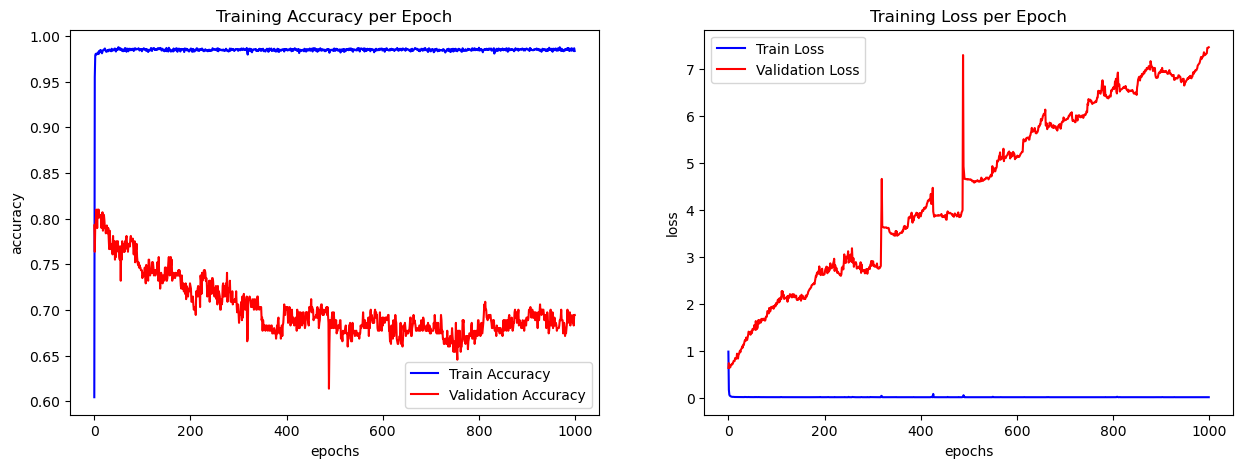

In [433]:
# plots
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(training_log['epoch'],training_log['accuracy'], label='Train Accuracy', color='b')
plt.plot(training_log['epoch'],training_log['val_accuracy'], label='Validation Accuracy', color='r')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training Accuracy per Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(training_log['epoch'],training_log['loss'], label='Train Loss', color='b')
plt.plot(training_log['epoch'],training_log['val_loss'], label='Validation Loss', color='r')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training Loss per Epoch')
plt.legend()


plt.show()



How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

R/ I did 1k epochs and decrease the batch size just to make a point
* The training data exponentially gets accurate and with almost no loss because is training data, the answer is already give to the model for training. 
* For the test data the model gets to a point where it can't get better hence the performancce when analyzing new data get stuck at some percentage and then starts to decrease . We can see some ripples maybe because of noise data and the model starts overfitting, even at some point the loss starts to grow instead of decrease and keeps growing.
* A picture of the normal run with 25 epochs and 32 batch size 
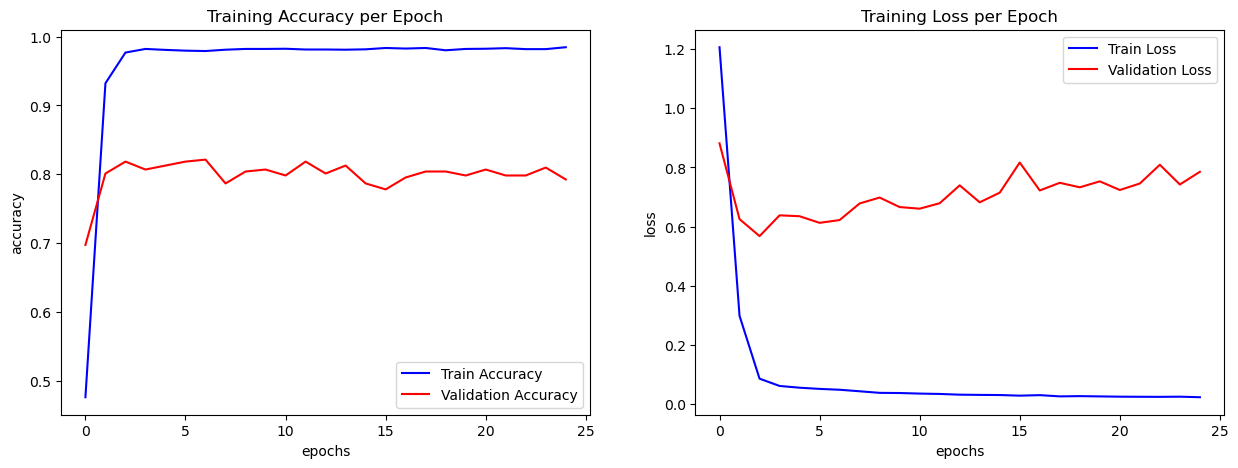

---
### Exercise 7

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

\R Ithik by doing the sliding window approach so the sliding window generates training data for the model given the characteristics chosen for the window.

---
### Exercise 8

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [2]:
# Taking the code from the lab
from gensim.models import KeyedVectors

# Note: this model is very huge, this will take some time ...
model_path = "data/google/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [3]:
# clustering target
target_list = ['angry', 'happy', 'sad', 'fear']
print('target words: ', target_list)

# convert to word vector
X = [w2v_google_model[word] for word in target_list]

target words:  ['angry', 'happy', 'sad', 'fear']


In [4]:
# Prepare data
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

C:\Users\Ellis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Ellis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Ellis\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


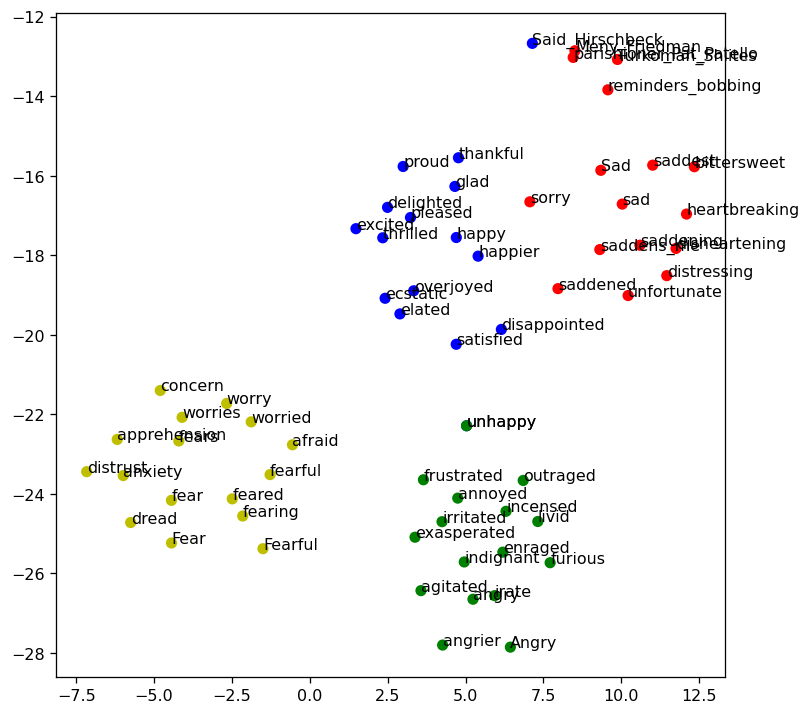

In [5]:
# Ploting for the top 15 words more related
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()